In [409]:
import numpy as np
import random
from matplotlib import pyplot as plt

def f(x):
    return 1 / (1 + x)

n = int(input())
a = -6
b = -2

50


### Посчитаем равномерно распределенное число из интервала [0,1]

In [410]:
def get_uniform_m(a, b):
    return (a + b) / 2

def get_uniform_D(a, b):
    return (a - b)**2 / 12

ksi = []
if not n or n == 1:
    ksi = [0.5]
else:
    for i in range(n):
        ksi.append(np.random.uniform(0, 1))

m = get_uniform_m(a, b)
D = get_uniform_D(a, b)
#print(ksi)

### Преобразуем полученное число в равномерно распределенное на интервале [a,b]

In [411]:
X = [t*(b-a)+a for t in ksi]
#print(X)

### Найдем Y=f(X)

In [412]:
Y = [f(x) for x in X]
#print(Y)

### Построим вариационный ряд и эмпирическую функцию распределения

1. 	y=-0.942622, 	F = 0
2. 	y=-0.887863, 	F = 0.02
3. 	y=-0.884691, 	F = 0.04
4. 	y=-0.805162, 	F = 0.06
5. 	y=-0.780105, 	F = 0.08
6. 	y=-0.697434, 	F = 0.1
7. 	y=-0.688356, 	F = 0.12000000000000001
8. 	y=-0.649975, 	F = 0.14
9. 	y=-0.640693, 	F = 0.16
10. 	y=-0.630111, 	F = 0.18
11. 	y=-0.616999, 	F = 0.19999999999999998
12. 	y=-0.534383, 	F = 0.21999999999999997
13. 	y=-0.512335, 	F = 0.23999999999999996
14. 	y=-0.504612, 	F = 0.25999999999999995
15. 	y=-0.501424, 	F = 0.27999999999999997
16. 	y=-0.453738, 	F = 0.3
17. 	y=-0.429202, 	F = 0.32
18. 	y=-0.429019, 	F = 0.34
19. 	y=-0.390097, 	F = 0.36000000000000004
20. 	y=-0.388918, 	F = 0.38000000000000006
21. 	y=-0.370339, 	F = 0.4000000000000001
22. 	y=-0.359327, 	F = 0.4200000000000001
23. 	y=-0.338817, 	F = 0.4400000000000001
24. 	y=-0.337514, 	F = 0.46000000000000013
25. 	y=-0.332530, 	F = 0.48000000000000015
26. 	y=-0.323677, 	F = 0.5000000000000001
27. 	y=-0.313965, 	F = 0.5200000000000001
28. 	y=-0.292261, 	F = 0.5400000000000

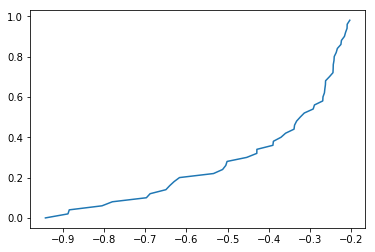

In [413]:
Y_var = sorted(Y)
counts = {}
for y in Y_var:
    counts[y] = counts.get(y, 0) + 1
F = [0]
for i in range(len(Y_var)-1):
    F.append(F[i] + counts[Y_var[i]] / n)

for i in range(len(Y_var)):
    print('{i}. \ty={0:.6f}, \tF = {F}'.format(Y_var[i], F=F[i], i=i+1))

def distr_fun(x):
    for i in range(1, len(Y_var)):
        if Y_var[i - 1] <= x < Y_var[i]:
            return F[i - 1]
    return 1
    
plt.plot(Y_var, F)

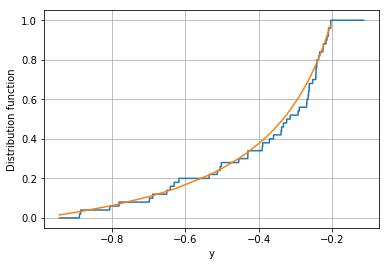

In [414]:
def g(y):
    return 1/4*(-1-1/y)

G = [g(y) for y in Y_var]

dots_y = []
dots_x = []
for j in range(len(F)-1):
    for i in range(100):
        dots_x.append(Y_var[j] + i * (Y_var[j+1] - Y_var[j]) / 100)
        dots_y.append(F[j])

for i in range(10):
    dots_x.append(Y_var[-1] + i / 100)
    dots_y.append(1)

plt.plot(dots_x, dots_y, Y_var, G)
plt.xlabel('y')
plt.ylabel('Distribution function')
plt.grid(True)

plt.show()

### Посторим гистограмму равноинтервальным методом

7
[-0.94262157 -0.83701832 -0.73141506 -0.62581181 -0.52020855 -0.4146053
 -0.30900204 -0.20339878]
Border: -0.8370183182631593, Count: 3
Border: -0.7314150624849047, Count: 2
Border: -0.62581180670665, Count: 5
Border: -0.5202085509283956, Count: 2
Border: -0.4146052951501409, Count: 6
Border: -0.3090020393718863, Count: 9
Border: -0.20339878359363175, Count: 23


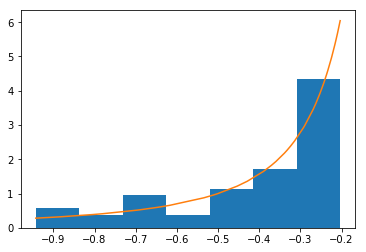

In [415]:
def get_bins_count(n):
    if n <= 100:
        return int(np.sqrt(n))
    else:
        return 4 * int(np.log10(n))

print(get_bins_count(n))

Y1 = np.copy(Y_var)
    
x, bins, kek = plt.hist(Y_var, get_bins_count(n), normed=1)

print(bins)
start_id = 0
counts = []
for border in bins:
    cnt = 0
    while start_id < n and Y_var[start_id] <= border:
        start_id += 1
        cnt += 1
    counts.append(cnt)

counts[1] += counts[0]
histogram = []
for i in range(1, len(counts)):
    print('Border: {b}, Count: {c}'.format(b=bins[i], c=counts[i]))
    histogram.append(((bins[i - 1], bins[i]), counts[i]))

def h(y):
    return 1/(4*y**2)

H = [h(y) for y in Y_var]
plt.plot(Y_var, H) 

### Построим гистограмму равновероятностнным методом

Column #1; Borders: L=-0.9426215740414139, R=-0.6691652562268169; Width=0.273456317814597
Column #2; Borders: L=-0.6691652562268169, R=-0.5030178978975378; Width=0.16614735832927907
Column #3; Borders: L=-0.5030178978975378, R=-0.36483312193077255; Width=0.13818477596676526
Column #4; Borders: L=-0.36483312193077255, R=-0.2907285645752481; Width=0.07410455735552446
Column #5; Borders: L=-0.2907285645752481, R=-0.2574873875807501; Width=0.03324117699449797
Column #6; Borders: L=-0.2574873875807501, R=-0.23497984303706315; Width=0.022507544543686975
Column #7; Borders: L=-0.23497984303706315, R=-0.20654503228542576; Width=0.028434810751637396
Column #8; Borders: L=-0.20654503228542576, R=-0.20339878359363175; Width=0.0031462486917940014


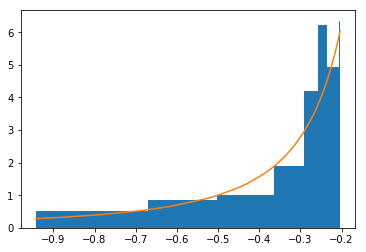

In [416]:
segments = get_bins_count(n)
borders_eq = [Y_var[0]] + [(Y_var[i] + Y_var[i + 1]) / 2 for i in range(n // segments - 1, n - 1, n // segments)] + [Y_var[-1]]

for i in range(1, len(borders_eq)):
    print('Column #{id}; Borders: L={L}, R={R}; Width={W}'.format(
        id=i, L=borders_eq[i-1], R=borders_eq[i], W=borders_eq[i]-borders_eq[i-1]))

plt.hist(Y_var, bins=borders_eq, normed=1)
plt.plot(Y_var, H) 

### Проверим критерий согласия Пирсона

In [421]:
from pprint import pprint
pprint(histogram)

chi_sqr = 0
for i in range(len(histogram)):
    l = histogram[i][0][0]
    r = histogram[i][0][1]
    pi_star = g(r) - g(l)
    pi = histogram[i][1] / n
    chi_sqr += (pi - pi_star)**2 / pi
chi_sqr *= len(histogram)
from scipy.stats import chi2
table_pirson = chi2.ppf(0.05, len(histogram))
print('Experimental chi square: {cs}, Table chi square: {ts}'.format(cs=chi_sqr, ts=table_pirson))
if chi_sqr < table_pirson:
    print('Good')

[((-0.94262157404141389, -0.83701831826315931), 3),
 ((-0.83701831826315931, -0.73141506248490473), 2),
 ((-0.73141506248490473, -0.62581180670665004), 5),
 ((-0.62581180670665004, -0.52020855092839557), 2),
 ((-0.52020855092839557, -0.41460529515014088), 6),
 ((-0.41460529515014088, -0.30900203937188631), 9),
 ((-0.30900203937188631, -0.20339878359363175), 23)]
Experimental chi square: 0.5558554721360716, Table chi square: 2.167349909298058
Good


### Проверим критерий согласия Колмогорова

In [424]:
max_deviation = 0
for i in range(n - 1):
    dl = abs(F[i] - g(Y_var[i]))
    if i < n:
        dr = abs(F[i + 1] - g(Y_var[i]))
    max_deviation = max(max_deviation, max(dl, dr))

kolmogorov = max_deviation * np.sqrt(n)
print('Kolmogorov equals ', kolmogorov)
print('Experimental deviation: {cs}, Table deviation: {ts}'.format(cs=max_deviation, ts=0.161))
if max_deviation < 0.161:
    print('Good')

Kolmogorov equals  0.701536462368
Experimental deviation: 0.09921223795804657, Table deviation: 0.161
Good


### Проверим критерий согласия Мизеса

In [425]:
mises = 1 / (12 * n)
for i in range(1, n):
    mises += (g(Y_var[i - 1]) - (i - 0.5) / n)**2

print('Experimental mises: {cs}, Table mises: {ts}'.format(cs=mises, ts=0.161))
if mises < 0.161:
    print('Good')

Experimental mises: 0.04756244851149723, Table mises: 0.161
Good
